<a href="https://colab.research.google.com/github/yumeniown/Software-Engineering-IT-Leaders-of-the-Future/blob/main/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_matplotlib%2C_seaborn%2C_bokeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Инструменты для визуализации данных

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
# cwd = os.getcwd()
# print(cwd)

Mounted at /content/drive


Лучший способ отобразить информацию и донести её до других — использовать визуальные методы: графики, диаграммы, тепловые карты и другие приёмы визуализации данных.
* линейный график;
* гистограмма;
* диаграмма рассеяния;
* коробчатая диаграмма;
* круговая диаграмма;
* столбчатая диаграмма;
* тепловая карта.

**ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)**

Это самый простой тип графика. Вы, несомненно, рисовали такие на уроках математики в школе.

Линейный график представляет собой последовательность точек, соединённых линией. Каждая точка — это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае).

На практике, в Data Science такие графики чаще всего используются для визуализации временных рядов, например чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций.

График бывает особенно полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.

Несмотря на свою простоту, при правильном применении линейный график может быть очень информативным и полезным: он позволяет выявить тенденцию движения показателя и найти ключевые точки его роста или падения.

https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

In [ ]:
# Ниже представлен график динамики продаж видеоигр в зависимости от региона. По оси ординат отложено число проданных дисков с
# видеоиграми (в миллионах) в различных регионах (NA — Северная Америка, EU — Европа, JP — Япония, Other — другие регионы,
#                                                 Global — во всём мире), по оси абсцисс — год выпуска игры.



Text(0, 0.5, 'Суммарный объём продаж')

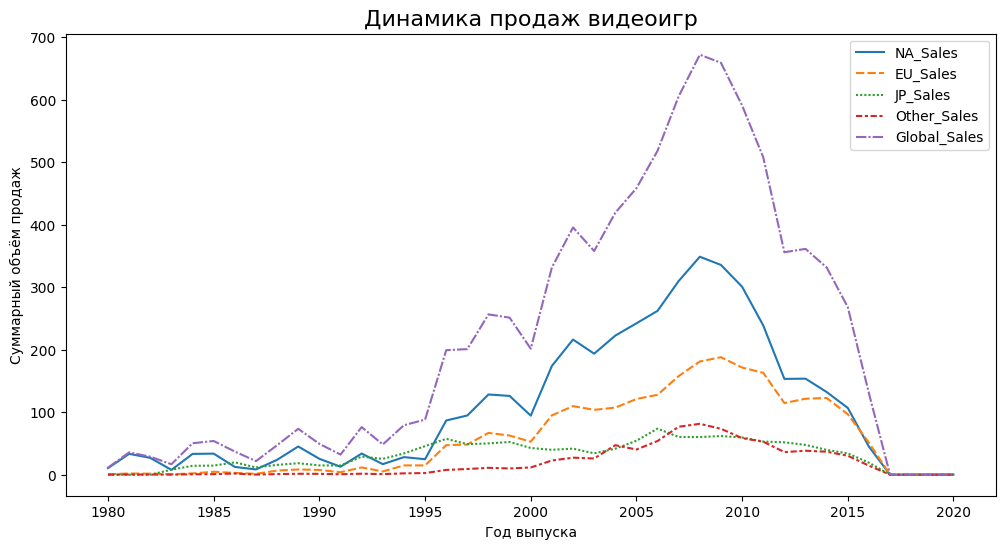

In [ ]:
vg_data = pd.read_csv('drive/MyDrive/vgsales.csv')

dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

Из графика отчётливо виден рост числа продаж видеоигр по всем рынкам примерно до 2007 года, после чего наблюдается резкий спад и неизбежное приближение числа продаж к 0 в 2020 году. Вполне объяснимое явление: именно в этот период наступает эра интернет-магазинов видеоигр и люди постепенно уходят от дисковых накопителей.

На графике можно отследить лидеров продаж, то, как они менялись, какие страны влияют на общие продажи, где абсолютный и относительный прирост продаж в динамике выше, а где — ниже.

**ГИСТОГРАММА (HISTOGRAM)**

Гистограмма — это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x.

Ось разбита на интервалы, их ещё называют корзинами (bins), их число задаётся пользователем. Ширина интервалов одинакова и задаёт ширину прямоугольника.

По оси y откладывается высота прямоугольника — количество наблюдений, которые попали в интервал. Чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например мы можем понять, как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

Text(0, 0.5, 'Тип объекта')

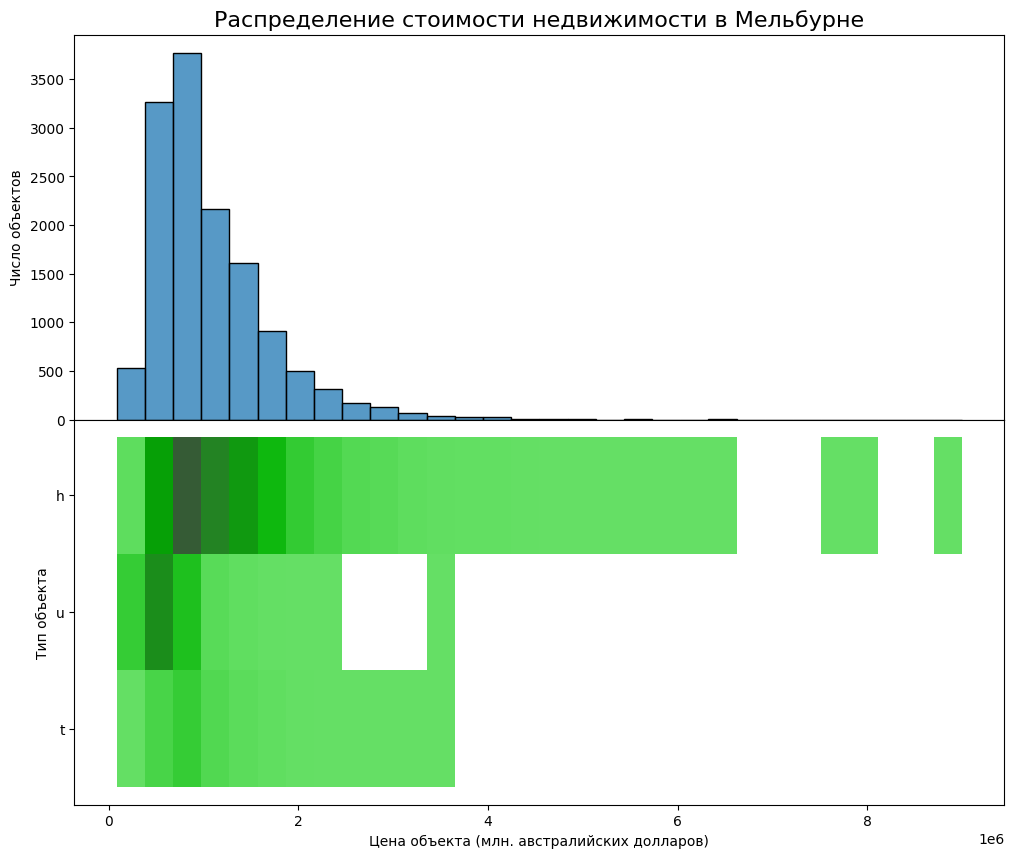

In [ ]:
# Ниже приведено два вида гистограмм с общей осью.

# Верхняя гистограмма описывает общее распределение стоимости недвижимости в Мельбурне.
# Весь диапазон цен разбит на 30 равных интервалов. На каждом интервале строится прямоугольник,
# его высота — число объектов, стоимость которых лежит в этом интервале.

# Нижняя гистограмма описывает то же распределение, но с учётом типов недвижимости. Здесь число объектов,
# попавших в корзину, обозначается интенсивностью цвета: чем темнее полоса, тем больше в данных объектов с ценой из этого интервала.

melb_data = pd.read_csv('drive/MyDrive/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data,
    x='Price',
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

Во-первых, основная часть цен на объекты сосредоточена в интервале от  0.1 до 2 млн, и наибольшее число цен лежит в интервале от 0.9 до 1.2 млн (самый высокий прямоугольник). Далее при повышении цены количество объектов только падает, что вполне соответствует жизненным реалиям — дорогих и роскошных домов гораздо меньше, чем домов среднего ценового сегмента. Забегая вперёд, в тему теории вероятности, скажем, что данная гистограмма очень напоминает логарифмическое нормальное распределение. Такой вид распределения очень распространён на практике.

Во-вторых, как видно из нижней гистограммы, объекты типа house (h) имеют схожее с общим распределение — их максимальная частота также наблюдается в третьем интервале, после чего идёт постепенное падение частоты (бледные полосы на высоких значениях цен). Цены на объекты типов unit (u) не превышают 4 млн, и их максимум наблюдается во втором интервале. Таунхаусы (t) имеют почти одинаковую частоту в каждом ценовом сегменте.

**ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)**

Другое название этого графика — точечная диаграмма.

График представляет собой облака точек: по оси абсцисс откладывается одна числовая переменная, по оси ординат — вторая, а каждая точка на графике — это запись из таблицы.

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако через настройки графика в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С их помощью мы можем увидеть, как зависит (или не зависит) давление от возраста пациента, объём продаж товаров от количества показанной рекламы и т. д.

Оценив взаимосвязь признаков, мы можем принять решение об использовании какого-то из признаков для предсказания.

Text(0, 0.5, 'Длина крыльев')

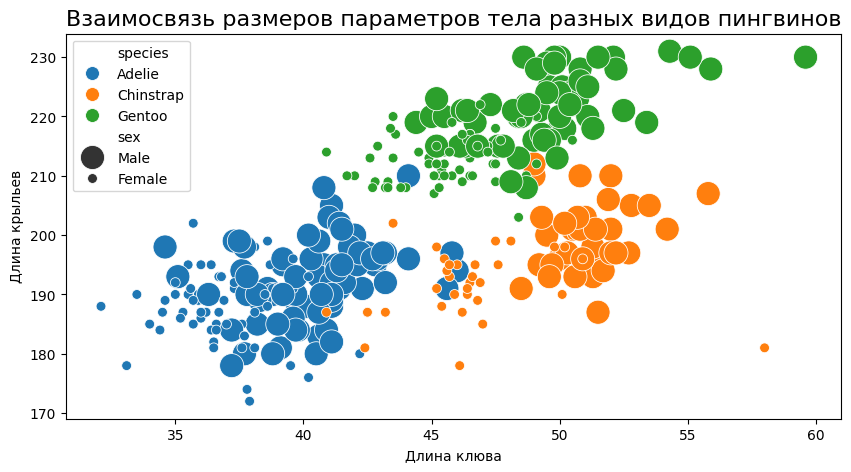

In [ ]:
# Окунёмся немного в орнитологию. На диаграмме рассеяния ниже показана зависимость длины крыльев пингвинов
# от длины их клюва в миллиметрах. При этом цвет точки на графике зависит от вида пингвина, а размер точки
# — от пола птицы. Итого на одном графике уместилась зависимость сразу между четырьмя признаками! И это ещё не предел.

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

Из диаграммы рассеяния отчётливо видна прямая связь параметров тела пингвина: чем больше длина клюва, тем больше длина крыльев. Причём облака точек разного цвета плотно сгруппированы относительно своих центров, и, основываясь на длине клюва и крыльев и на половой принадлежности птицы, можно достаточно хорошо предсказать вид пингвина. К тому же ярко виден половой диморфизм: длина клюва и крыльев у самцов несколько больше, чем у самок.

**КРУГОВАЯ ДИАГРАММА (PIE CHART)**

Синонимичные названия диаграммы — пироговая диаграмма и секторная диаграмма.

Круговая диаграмма представляет собой круг, разделённый на секторы. Весь круг составляет 100 %. Каждый из секторов отображает долю одной из категорий в данных, размер сектора соответствует части целого от круга.

Диаграмма является способом визуализации для категориального признака: например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец.

Круговые диаграммы наглядны, когда нужно показать, как делится на части что-либо целое: например, так можно визуализировать вклад каждого из продавцов в выручку магазина. Однако круговые диаграммы неудобны, когда рассматривается больше одного признака — в этом случае приходится добавлять отдельную диаграмму. Из-за большей информативности столбчатых диаграмм специалисты склонны выбирать именно их.

https://www.kaggle.com/datasets/mylesoneill/game-of-thrones

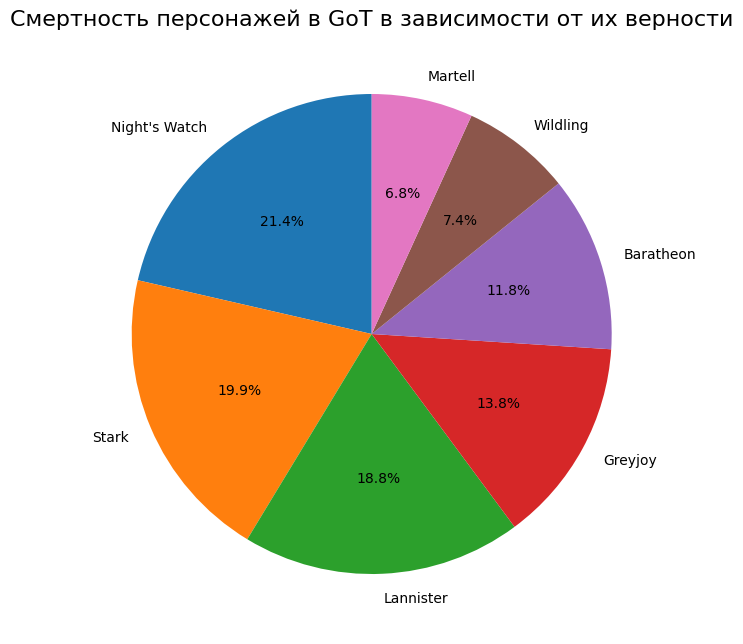

In [ ]:
# Перед вами диаграмма количества погибших главных и второстепенных персонажей в сериале «Игра престолов» в
# зависимости от их верности какому-либо из домов. На диаграмме изображены названия семи домов (None — персонаж
# не принадлежал к определённому дому), а внутри секторов указано количество погибших персонажей в процентах.
game_of_thrones_df = pd.read_csv('drive/MyDrive/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Из представленной диаграммы видно, что большинство погибших в сериале персонажей не принадлежали ни к одному из домов. На популярный вопрос «Кого чаще убивают, верных Старкам или Ланнистерам?» однозначного ответа нет, группы приблизительно одинаковы.

**СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)**

Столбчатая диаграмма также максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя.

Основное применение столбчатых диаграмм в Data Science — сравнение категорий друг с другом. Например, сравнение ресторанов по суммарной прибыли, сравнение средних расходов пользователей, сравнение медианной стоимости квартир по районам и т. д.

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым повышая информативность. Такие диаграммы называются многоуровневыми.

https://www.kaggle.com/datasets/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others

<ipython-input-6-9241f5e9fd74>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot1 = sns.barplot(
<ipython-input-6-9241f5e9fd74>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot2 = sns.barplot(


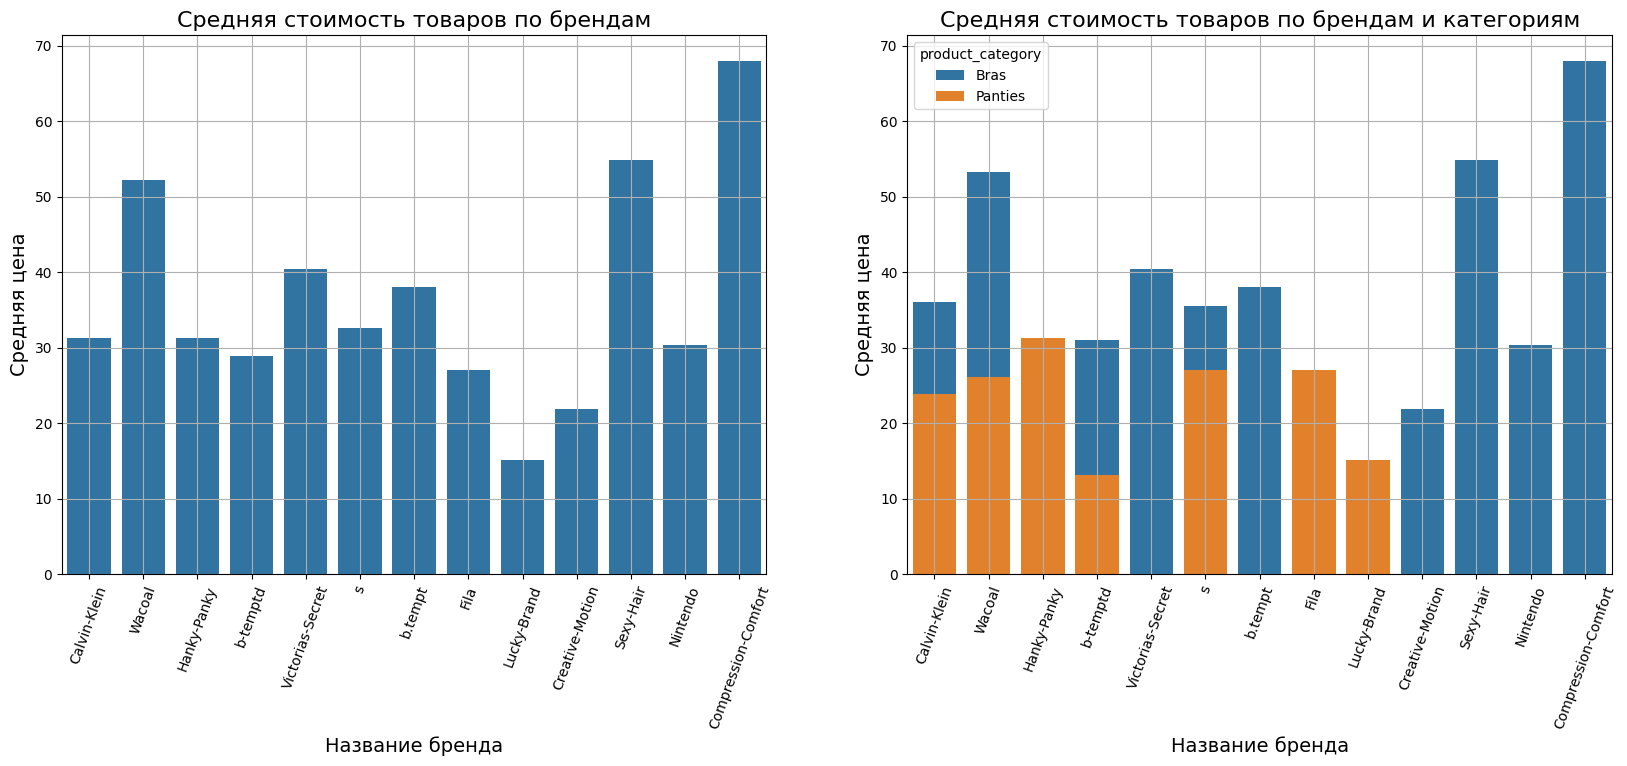

In [ ]:
# В качестве примера приведём две диаграммы стоимости женского нижнего белья на сайте Amazon.

# На левой диаграмме изображены средние цены товаров для каждого бренда. На правой диаграмме изображены те же цены,
#  но с разделением цветом по категориям товаров (Bras — бюстгальтеры, Panties — трусы). Правая диаграмма является многоуровневой столбчатой диаграммой.
amazon_data = pd.read_csv('drive/MyDrive/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name

amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

Из левой диаграммы видно, что наибольшую среднюю цену имеют товары бренда Compression-Comfort, а наименьшую — Lucky-Brand.

Из правого графика можно заметить, что средняя цена трусов всегда ниже средней цены бюстгальтеров.

Кроме того, для некоторых брендов в данных есть информация только о бюстгальтерах или только о трусах (их столбцы окрашены только синим или только оранжевым цветом).

**ТЕПЛОВАЯ КАРТА (HEATMAP)**

Тепловая карта — это графическое представление некоторой таблицы, где значения в ячейках выделяются определённым цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Способы применения тепловых карт разнообразны: от визуализации категорий объектов на изображениях до графического представления матриц.

При исследовании табличных данных тепловые карты чаще всего применяются для визуализации сводных таблиц.

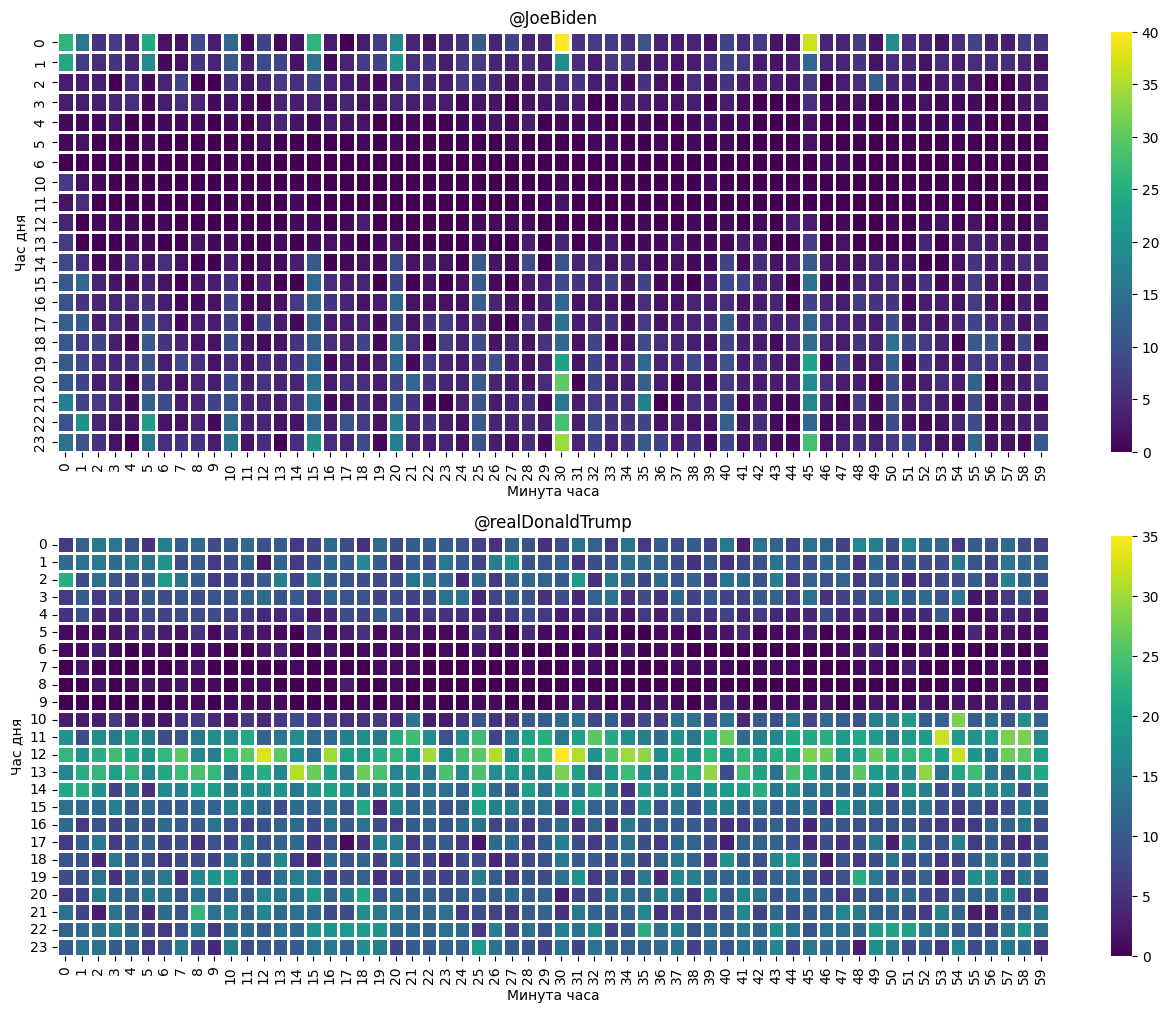

In [ ]:
# Ниже представлена тепловая карта ежедневной активности в Twitter Дональда Трампа и
# Джо Байдена перед американскими президентскими выборами в 2020 году.

# На оси абсцисс отложены минуты, а на оси ординат — часы. Квадраты тепловых карт окрашены в соответствии с тем,
#  сколько твитов было выложено кандидатами в каждую часовую/минутную ячейку за указанный период. Сбоку находится легенда,
#  которая показывает соотношения цвета и количества твитов.

tweets_df = pd.read_csv("https://bit.ly/3cngqgL",
                 parse_dates=['date_utc'],
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тёмная полоса, соответствующая первой половине дня, говорит о том, что оба кандидата не заходят в Twitter по утрам.

У Дональда Трампа тепловая карта намного ярче, чем у Джо Байдена, что говорит о том, что Трамп выкладывает твиты намного чаще.

Кроме того, можно сказать, что Байден предпочитает посещать соцсети в конце дня — основная масса его твитов сделана после семи часов вечера.

## Аттестация

Популярные статьи на Хабре - [ссылка](https://www.kaggle.com/competitions/howpop-habrahabr-favs/data?select=howpop_train.csv)

Файл howpop_train.csv(также есть на платформе)



1. Проведите первичный анализ данных
    * Изучите данные
    * Обработайте пропуски
    * Преобразуйте признаки, если требуются
    * Постройте графики для общего понимания о данных
2. Проверьте данные на нормальность(2-3 стобца)
    * Объясните выбор теста
3. Выдвинете гипотезу(минимум 2), проверьте ее, не забывая объясняя свой выбор

После каждой обработки данных/графика/теста **обязательно вывод**

**Сдавать ссылка на колаб + файл**
